# Credit Card Fraud Detection
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [97]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_predict, RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

## Data Exploration

In [2]:
raw_data = pd.read_csv('creditcard.csv')

In [3]:
raw_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Based on the source of this dataset, many columns were renamed and rescaled via PCA as they contain confidential information. The only known features are Time and Amount. Class is used to identify whether a transaction was fraud. 

In [6]:
raw_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
raw_data['Class'].count()

284807

We can see that the amount of non-fraud transaction heavily outnumber those that were actual fraud transactions. It is clear that this is an unbalanced dataset

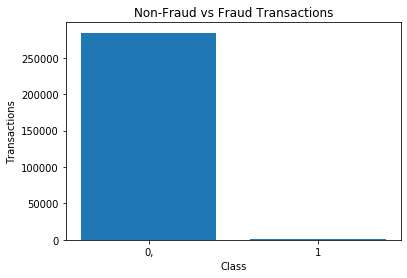

In [8]:
# Plotting count of non-fraud vs fraud transactions
objects = ('0,', '1')

plt.bar(raw_data['Class'].unique(), raw_data['Class'].value_counts())
plt.title('Non-Fraud vs Fraud Transactions')
plt.xticks(raw_data['Class'].unique(), objects)
plt.ylabel('Transactions')
plt.xlabel('Class')
plt.show()

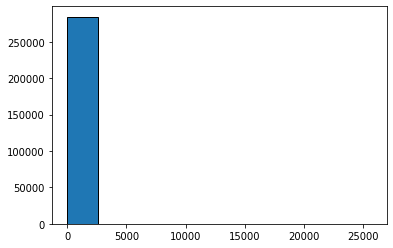

In [9]:
plt.hist(raw_data['Amount'], edgecolor='black')
plt.show()

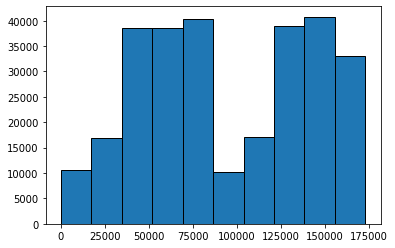

In [10]:
plt.hist(raw_data['Time'], edgecolor='black')
plt.show()

In [11]:
# Need to scale time and amount to be close to the range of the other features

standard_scaler = StandardScaler()
robust_scaler = RobustScaler() # used for outliers - applicable to Time

# reshape(-1,1) ensures that the shape is compatible with the original shape
raw_data['Scaled_Time'] = robust_scaler.fit_transform(raw_data['Time'].values.reshape(-1,1))
raw_data['Scaled_Amount'] = standard_scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))


In [12]:
# Drop old raw_data Time and Amount
raw_data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [13]:
raw_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,-0.073403


We need to create a subset of data which contains a balanced set containing both fraud and non-fraud transactions. For this, we will use Random under-sampling. We will do this by matching the non-fraud transactions to be the same as the number of fraud transactions. 

The trade-off for doing this is that we might lose a lot of information since we are decreasing the non-fraud transactions down to 492. 

In [14]:
shuffled_data = raw_data.sample(frac = 1, random_state = 1)

In [15]:
fraud_data = shuffled_data.loc[shuffled_data['Class'] == 1]

In [16]:
non_fraud_data = shuffled_data.loc[shuffled_data['Class'] == 0][:shuffled_data['Class'].value_counts()[1]]

In [17]:
balanced_data = pd.concat([fraud_data, non_fraud_data])

balanced_data = balanced_data.sample(frac = 1, random_state = 1)

In [18]:
balanced_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [19]:
balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
125314,-1.253215,1.758471,1.719816,2.708741,-0.056567,1.529020,-0.864988,-3.102803,-0.192266,1.235317,...,-0.422691,0.061007,-0.465925,-0.128512,0.398483,0.462971,-0.000662,0,-0.083166,-0.267910
96341,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,0.264545,...,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1,-0.222794,0.038623
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,0.812780,-0.353229
90956,0.994100,-0.449771,-0.045731,-0.582983,-0.786465,-0.874566,-0.172380,-0.016904,1.327152,-1.406480,...,0.086370,-0.230433,0.246285,0.591999,-0.653492,0.058589,0.061649,0,-0.251918,0.118865
21096,-0.678124,-0.186876,2.989155,0.424337,-0.458720,1.996461,-0.369584,0.403119,0.982392,-0.590724,...,0.769421,-0.440813,-0.899838,0.423146,0.883422,-0.072178,-0.155181,0,-0.625372,-0.038980


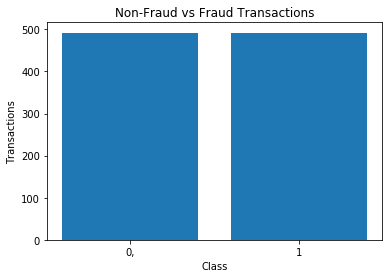

In [20]:
# Plotting count of non-fraud vs fraud transactions
objects = ('0,', '1')

plt.bar(balanced_data['Class'].unique(), balanced_data['Class'].value_counts())
plt.title('Non-Fraud vs Fraud Transactions')
plt.xticks(balanced_data['Class'].unique(), objects)
plt.ylabel('Transactions')
plt.xlabel('Class')
plt.show()

In [21]:
# Correlation matrix of the balanced data set
corr_balanced_data = balanced_data.corr()

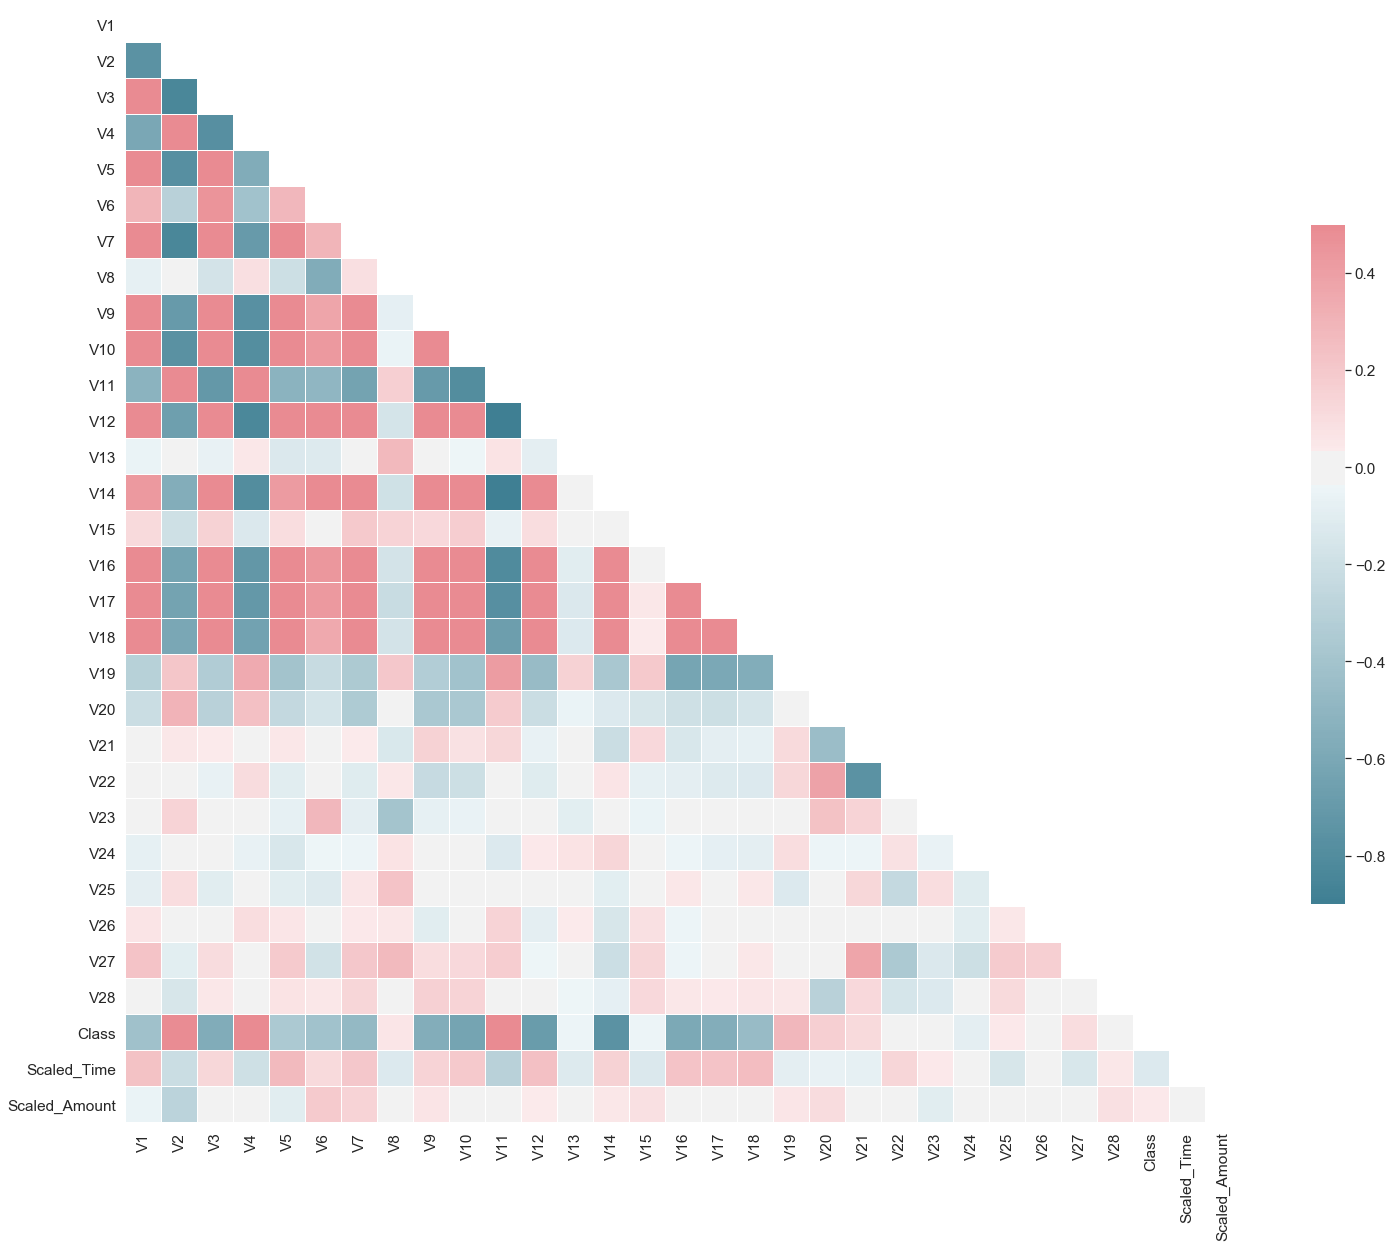

In [22]:
sns.set(style="white", font_scale=1.4)
mask = np.zeros_like(corr_balanced_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_balanced_data, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
corr_class = corr_balanced_data['Class']
indices_class = corr_balanced_data['Class'].index

features = []
value_corr_features = []

for value, index in zip(corr_class, indices_class):
    if abs(value) > 0.2:
        features.append(index)
        value_corr_features.append(value)

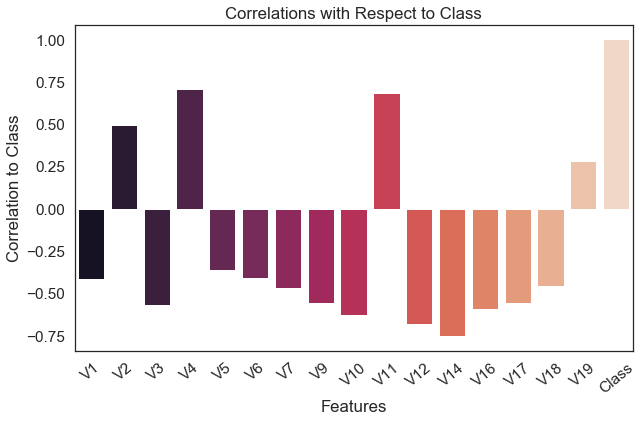

In [24]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=features, y=value_corr_features, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.title('Correlations with Respect to Class')
plt.xlabel('Features')
plt.ylabel('Correlation to Class')
plt.show()

By inspection, we can see that the fraud transaction has a positive correlaton with features V4, V11, V2, and V19 while it has negative correlation with V14, V12, V10 and V16. While it is clear that other features have a negative correlation with the class, we will be looking into the listed features as they have the higher correlation with the class. As such, we will need to remove outliers from these features as they will have an impact on the accuracy of the machine learning models. 

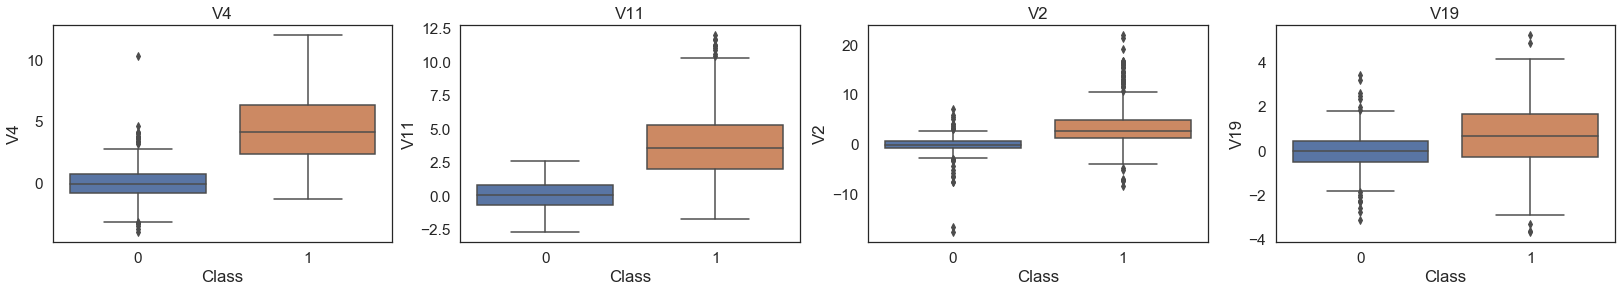

In [25]:
# Let's see if there are any outliers on the listed features. 
f, axes = plt.subplots(ncols=4, figsize=(28,4))
# Positive features
sns.boxplot(x="Class", y="V4", data=balanced_data, ax=axes[0])
axes[0].set_title('V4')
sns.boxplot(x="Class", y="V11", data=balanced_data, ax=axes[1])   
axes[1].set_title('V11')
sns.boxplot(x="Class", y="V2", data=balanced_data, ax=axes[2]) 
axes[2].set_title('V2')
sns.boxplot(x="Class", y="V19", data=balanced_data, ax=axes[3])   
axes[3].set_title('V19')
plt.show()

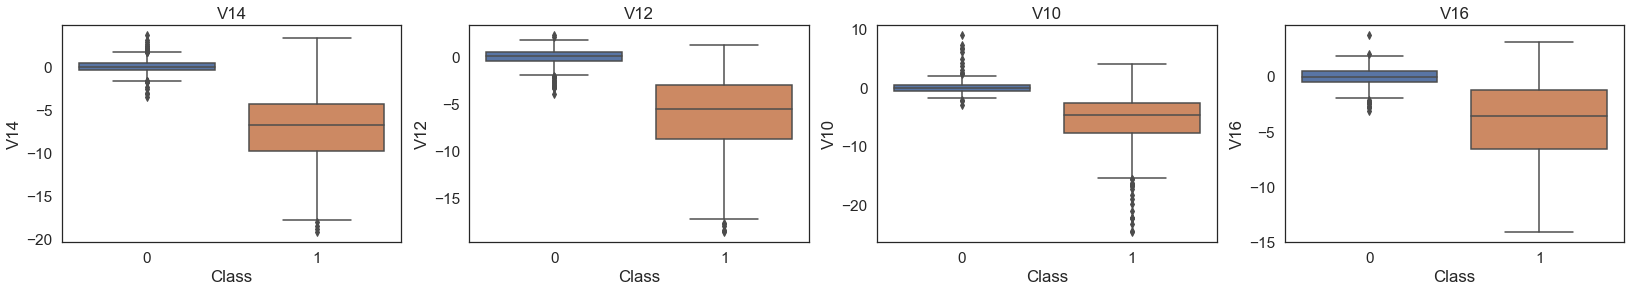

In [26]:
f, axes = plt.subplots(ncols=4, figsize=(28,4))
# Positive features
sns.boxplot(x="Class", y="V14", data=balanced_data, ax=axes[0])
axes[0].set_title('V14')
sns.boxplot(x="Class", y="V12", data=balanced_data, ax=axes[1])   
axes[1].set_title('V12')
sns.boxplot(x="Class", y="V10", data=balanced_data, ax=axes[2]) 
axes[2].set_title('V10')
sns.boxplot(x="Class", y="V16", data=balanced_data, ax=axes[3])   
axes[3].set_title('V16')
plt.show()

Based on the box plots, there exists multiple outliers beyond the 25th and 75th percentiles. We determine the threshold for removing outliers by multiplying a number by the interquartile range. The higher this threshold, the less outliers it will detect. The lower the threshold, the more outliers it will detect. 

We want to focus on removing extreme outliers instead of general outliers as we might run into the risk of losing information. 

Let's reduce the outliers for V4 (class 0), V2 (class 0 and 1), V10 (class 0 and 1), V16 (class 0)

In [27]:
# Play with cut off values to determine which to cut off
V2_fraud = balanced_data['V2'].loc[balanced_data['Class'] == 0].values
V2_q25 = np.percentile(V2_fraud, 25)
V2_q75 = np.percentile(V2_fraud, 75)
V2_iqr = V2_q75 - V2_q25

V2_cut_off = V2_iqr * 3
V2_lower = V2_q25 - V2_cut_off
V2_upper = V2_q75 + V2_cut_off

V2_outliers = []

for data in V2_fraud:
    if (data < V2_lower or data > V2_upper):
        V2_outliers.append(data)
print(len(V2_outliers))


12


In [28]:
# Create a function to remove outliers based on cutoff
def remove_outliers(dataframe, feature, fraud_class, cutoff):
    feature_data = dataframe[feature].loc[dataframe['Class'] == fraud_class].values
    feature_q25 = np.percentile(feature_data, 25)
    feature_q75 = np.percentile(feature_data, 75)
    feature_iqr = feature_q75 - feature_q25
    
    feature_cut_off = feature_iqr * cutoff
    feature_lower = feature_q25 - feature_cut_off
    feature_upper = feature_q75 + feature_cut_off
    
    feature_outliers = []

    for data in feature_data:
        if (data < feature_lower or data > feature_upper):
            feature_outliers.append(data)
    # print("Found {} outliers".format(len(feature_outliers)))
    df = dataframe.drop(dataframe[(dataframe[feature] > feature_upper) | (dataframe[feature] < feature_lower)].index)
    return df

In [29]:
# Let's reduce the outliers for V4 (class 0), V2 (class 0 and 1), V10 (class 0 and 1), V16 (class 0)
# Use function to print and see how many outliers were removed
# test = remove_outliers(balanced_data, 'V16', 0, 1.85)

In [30]:
#balanced_data = remove_outliers(balanced_data, 'V4', 0, 3)
#balanced_data = remove_outliers(balanced_data, 'V2', 0, 3)
balanced_data = remove_outliers(balanced_data, 'V2', 1, 4)
balanced_data = remove_outliers(balanced_data, 'V10', 1, 4)
balanced_data = remove_outliers(balanced_data, 'V12', 1, 4)
#balanced_data = remove_outliers(balanced_data, 'V16', 0, 3)

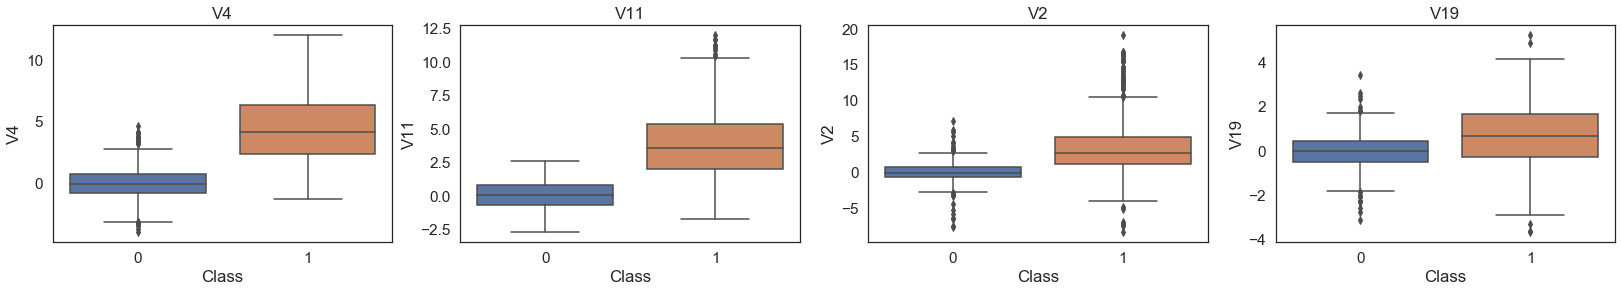

In [31]:
# Let's see if there are any outliers on the listed features. 
f, axes = plt.subplots(ncols=4, figsize=(28,4))
# Positive features
sns.boxplot(x="Class", y="V4", data=balanced_data, ax=axes[0])
axes[0].set_title('V4')
sns.boxplot(x="Class", y="V11", data=balanced_data, ax=axes[1])   
axes[1].set_title('V11')
sns.boxplot(x="Class", y="V2", data=balanced_data, ax=axes[2]) 
axes[2].set_title('V2')
sns.boxplot(x="Class", y="V19", data=balanced_data, ax=axes[3])   
axes[3].set_title('V19')
plt.show()

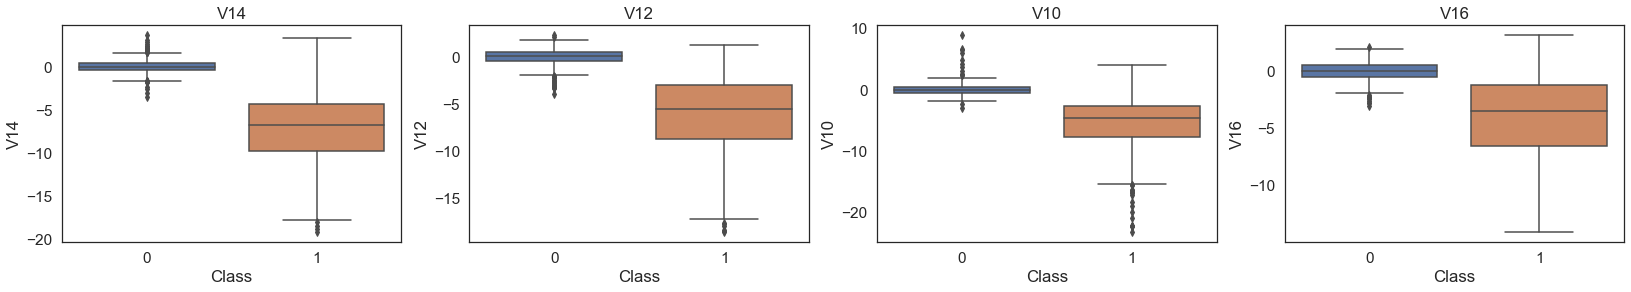

In [32]:
f, axes = plt.subplots(ncols=4, figsize=(28,4))
# Positive features
sns.boxplot(x="Class", y="V14", data=balanced_data, ax=axes[0])
axes[0].set_title('V14')
sns.boxplot(x="Class", y="V12", data=balanced_data, ax=axes[1])   
axes[1].set_title('V12')
sns.boxplot(x="Class", y="V10", data=balanced_data, ax=axes[2]) 
axes[2].set_title('V10')
sns.boxplot(x="Class", y="V16", data=balanced_data, ax=axes[3])   
axes[3].set_title('V16')
plt.show()

We can visually see that there are fewer outliers for the selected features that we modified.

In [33]:
balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
125314,-1.253215,1.758471,1.719816,2.708741,-0.056567,1.529020,-0.864988,-3.102803,-0.192266,1.235317,...,-0.422691,0.061007,-0.465925,-0.128512,0.398483,0.462971,-0.000662,0,-0.083166,-0.267910
96341,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,0.264545,...,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1,-0.222794,0.038623
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,0.812780,-0.353229
90956,0.994100,-0.449771,-0.045731,-0.582983,-0.786465,-0.874566,-0.172380,-0.016904,1.327152,-1.406480,...,0.086370,-0.230433,0.246285,0.591999,-0.653492,0.058589,0.061649,0,-0.251918,0.118865
21096,-0.678124,-0.186876,2.989155,0.424337,-0.458720,1.996461,-0.369584,0.403119,0.982392,-0.590724,...,0.769421,-0.440813,-0.899838,0.423146,0.883422,-0.072178,-0.155181,0,-0.625372,-0.038980


## Clustering

In [34]:
# We wil use t-SNE and PCA to see if we can accurately cluster the cases that were fraud and non-fraud. 

In [35]:
X = balanced_data.drop('Class', axis = 1)
y = balanced_data['Class']

t_SNE_model = TSNE(n_components=2, random_state = 1)
X_tsne = t_SNE_model.fit_transform(X)

t_PCA_model = PCA(n_components=2, random_state = 1)
X_PCA = t_PCA_model.fit_transform(X)

[]

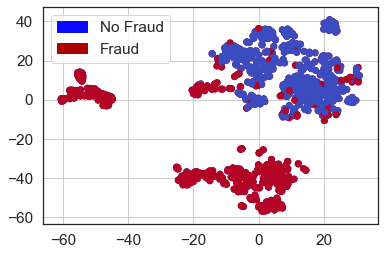

In [36]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

plt.scatter(X_tsne[:,0],X_tsne[:,1], c=(y==0), cmap='coolwarm', label='No Fraud')
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=(y==1), cmap='coolwarm', label='No Fraud')
plt.legend(handles=[blue_patch, red_patch])
plt.grid(True)
plt.plot()


In [37]:
X_tsne[0]

array([10.710694, -5.028756], dtype=float32)

[]

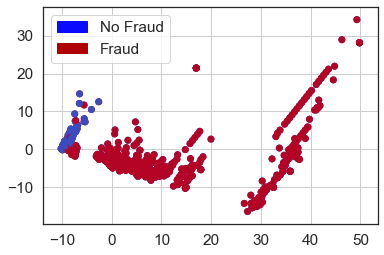

In [38]:
plt.scatter(X_PCA[:,0],X_PCA[:,1], c=(y==0), cmap='coolwarm', label='No Fraud')
plt.scatter(X_PCA[:,0],X_PCA[:,1], c=(y==1), cmap='coolwarm', label='No Fraud')
plt.legend(handles=[blue_patch, red_patch])
plt.grid(True)
plt.plot()


# Model Implementation

We will compare:
- Logistic Regression
- KNN
- Random Forest Classification

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [43]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
train_score = cross_val_score(log_model, X_train, y_train, cv = 5)
print(train_score.mean())

0.9438592193369264


In [56]:
pred_log = log_model.predict(X_test)

In [57]:
print('Accuracy: %.2f%%' % (accuracy_score(y_test, pred_log)*100))

Accuracy: 94.90%


In [61]:
# Print classification report
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        84
           1       0.96      0.95      0.95       112

    accuracy                           0.95       196
   macro avg       0.95      0.95      0.95       196
weighted avg       0.95      0.95      0.95       196



In [72]:
cnf_matrix_log = confusion_matrix(y_test, pred_log)
# print (cnf_matrix_log)
class_names = balanced_data['Class'].unique()
class_names_label = [0, 1]

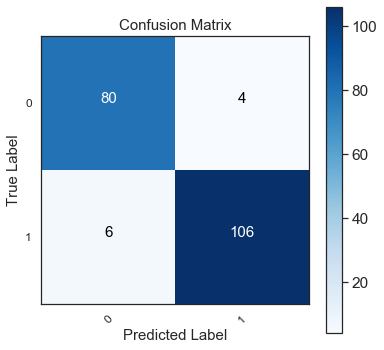

In [68]:
plt.figure(figsize=(6,6))
plt.imshow(cnf_matrix_log, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names_label, rotation=45, fontsize=12)
plt.yticks(tick_marks, class_names_label, fontsize=12)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)


for i in range(len(cnf_matrix_log)):
    for j in range(len(cnf_matrix_log[i])):
        color = 'black'   
        if cnf_matrix_log[i][j] > 50:
            color = 'white'
        plt.text(j, i, format(cnf_matrix_log[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

Area under the ROC curve: 0.949405


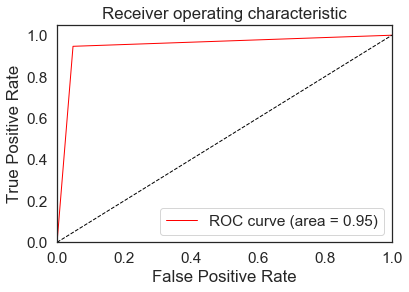

In [71]:
# ROC curve - plot True Positive Rate against False Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, pred_log)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f" % roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
# kNN
kNN_model = KNeighborsClassifier()
kNN_model.fit(X_train, y_train)
train_score = cross_val_score(kNN_model, X_train, y_train, cv = 5)
print(train_score.mean())

0.9374571288584027


In [73]:
# RF
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
train_score = cross_val_score(RF_model, X_train, y_train, cv = 5)
print(train_score.mean())

0.9425690021231423


In [ ]:
# SMOTE

In [78]:
smt = SMOTE(sampling_strategy = 'minority', random_state = 42)

In [85]:

X_orig = raw_data.drop(['Class'], axis=1)
y_orig = raw_data['Class']
# x_resampled, y_resampled = smt.fit_sample(X_train, y_train)

In [86]:
x_resampled, y_resampled = smt.fit_sample(X_orig, y_orig)

In [87]:
len(X_orig)

284807

In [88]:
len(x_resampled)

568630

In [89]:
y_resampled.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [101]:
# accuracy_list = []
# precision_list = []
# recall_list = []
# f1_list = []
# auc_list = []

# log_reg_model = LogisticRegression()
# log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
# sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig)

# for train, test in sss.split(X_train_orig, y_train_orig):
#     pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority', random_state=42), rand_log_reg)
#     model = pipeline.fit(train, test)
# # use kf


In [ ]:
# def run_kfold(X, Y, model):
    
#     kf = KFold(n_splits=10) #n_splits previously n_folds
    
#     outcomes = []
#     fold = 0
    
#     for train_index, test_index in kf.split(X):
#         fold += 1
#         X_train, X_test = X.values[train_index], X.values[test_index]
#         Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
#         model.fit(X_train, Y_train)
#         predictions = model.predict(X_test)
        
#         accuracy = r2_score(Y_test, predictions)
#         outcomes.append(accuracy)
#         print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
#     mean_outcome = np.mean(outcomes)
#     std_outcome=np.std(outcomes)
#     var_outcome = np.var(outcomes)
#     print("Mean r2: {0}".format(mean_outcome)) 
#     print("Standard Deviation: {0}".format(std_outcome)) 
#     print("Variance: {0}".format(var_outcome)) 
    
#     return {'mean': mean_outcome, 'std': std_outcome, 'var': var_outcome, 'outcomes': outcomes}

In [ ]:
# edit kfold fold function to include SMOTE then do the logistic regression and compare it with random under sampling